In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [158]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/ggogia/Desktop/erdos/project/Global Protest Tracker - View Data.csv')

# Display the first 5 rows

# Print the column names and their data types
print(df.head())

      Country                                      Protest Name Start Date  \
0     Ecuador                 Protest for "Guayaquil Four" boys     24-Dec   
1       Kenya  Protest against abductions of government critics     24-Dec   
2  Bangladesh                                   March for Unity     24-Dec   
3     Türkiye                              Minimum wage protest     24-Dec   
4       Syria                     Protest for religious freedom     24-Dec   

  Freedom Rating (Status)                                           Triggers  \
0             Partly Free  Four teenage boys (the "Guayaquil Four") disap...   
1             Partly Free  The Kenya National Commission on Human Rights ...   
2             Partly Free  The Anti-Discrimination Student Movement organ...   
3                Not Free  The Turkish government raised the monthly mini...   
4                Not Free  A video posted on social media showed masked i...   

                                         Motivatio

In [159]:
import pandas as pd

# Remove rows with invalid date format
df = df[pd.to_datetime(df['Start Date'], format='%d-%b', errors='coerce').notna()]

# Extract the year from `Start Date`


df['Peak Size'] = df['Peak Size'].astype(str).str.replace(' ', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('>', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('<', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace(',', '')
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('.', '', regex=False)


df['Peak Size'] = df['Peak Size'].astype(str).str.replace('million', '000000', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Thousands', '2000', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Hundreds', '200', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('100s', '200', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Unknown', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('NaN', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('nan', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Tensofthousands', '20000', regex=False)

df['Peak Size'] = pd.to_numeric(df['Peak Size'])




In [160]:
df = df[df['Peak Size'] < 1e7]


df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
0,Ecuador,"Protest for ""Guayaquil Four"" boys",24-Dec,Partly Free,"Four teenage boys (the ""Guayaquil Four"") disap...",Demand justice for missing boys. Express anger...,100.0,"General public, families of missing boys",Active,The nationwide protests pushed authorities to ...,X,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Quito
1,Kenya,Protest against abductions of government critics,24-Dec,Partly Free,The Kenya National Commission on Human Rights ...,Denounce the extrajudicial arrests. Demand tha...,100.0,"Human rights groups, youth",1 day,No policy/leadership change. Though President ...,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Nairobi
2,Bangladesh,March for Unity,24-Dec,Partly Free,The Anti-Discrimination Student Movement organ...,Call for prosecution of Hasina and others resp...,1000.0,Anti-Discrimination Student Movement (student ...,1 day,No policy/leadership change. The interim gover...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Dhaka
3,Türkiye,Minimum wage protest,24-Dec,Not Free,The Turkish government raised the monthly mini...,Demand greater increase in minimum wage. Frust...,1000.0,"General public, workers",1 day,No policy/leadership change.,NaN,X,NaN,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Ankara
4,Syria,Protest for religious freedom,24-Dec,Not Free,A video posted on social media showed masked i...,Express anger over burning of the Christmas tr...,100.0,Christians,1 day,No policy/leadership change.,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Damascus


In [161]:
df.shape

(743, 22)

In [162]:

df["Peak Size"].sort_values()

152         10.0
114         10.0
212         10.0
356         10.0
36          10.0
253         10.0
0          100.0
240        100.0
243        100.0
460        100.0
247        100.0
458        100.0
249        100.0
455        100.0
254        100.0
447        100.0
264        100.0
266        100.0
267        100.0
269        100.0
271        100.0
272        100.0
275        100.0
277        100.0
238        100.0
467        100.0
469        100.0
468        100.0
502        100.0
154        100.0
501        100.0
158        100.0
162        100.0
497        100.0
169        100.0
193        100.0
197        100.0
234        100.0
206        100.0
484        100.0
211        100.0
213        100.0
216        100.0
217        100.0
220        100.0
223        100.0
225        100.0
279        100.0
485        100.0
433        100.0
287        100.0
148        100.0
386        100.0
339        100.0
383        100.0
342        100.0
343        100.0
379        100.0
376        100

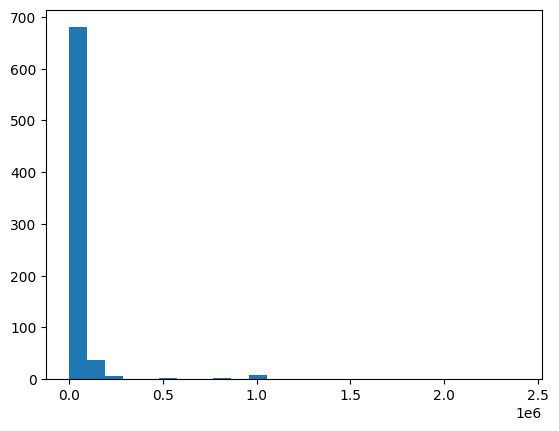

In [163]:
hist, bins, _ = plt.hist(df["Peak Size"].values, bins=25)




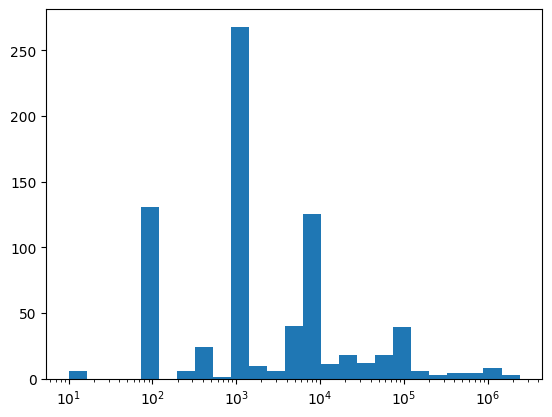

In [164]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(df["Peak Size"], bins=logbins)
plt.xscale('log')
plt.show()

In [165]:
df[df["Peak Size"]>1000000.0]

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
138,Germany,Anti-AfD protest,24-Jan,Free,Reports that a group of officials from the Alt...,Denounce the AfD and Nazism.,2400000.0,General public,6 months; 1 week in August 2024,No policy/leadership change in response to the...,NaN,NaN,X,NaN,NaN,Millions,NaN,X,NaN,X,NaN,Berlin
683,Bolivia,Wildfire protests,19-Oct,Partly free,Then president Evo Morales’s refusal to declar...,Morales’ environmental policies and growing po...,1500000.0,General public.,1 week,No policy/leadership change in response to the...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,X,La Paz
738,Hong Kong,Hong Kong autonomy protests,19-Apr,Partly free,"In 2019, introduction of a bill that would per...","Erosion of Hong Kong’s one country, two system...",2000000.0,"General public, especially younger citizens an...","1 year, 4 months (sporadic)",The Hong Kong government retracted the extradi...,NaN,NaN,X,NaN,NaN,Thousands,X,NaN,NaN,NaN,NaN,Hong Kong


In [166]:
15000000.0

15000000.0

In [167]:
1500000.0

1500000.0

In [168]:
def convert_custom_date_format(df, date_column='Start Date', new_column='datetime'):
    """
    Converts dates in 'YY-Mon-DD' format to datetime objects.

    Args:
        df (pd.DataFrame): The DataFrame containing the date column.
        date_column (str): The name of the date column.
        new_column (str): The name of the new datetime column.

    Returns:
        pd.DataFrame: The DataFrame with the new datetime column.
    """
    new_dates = []
    for date_str in df[date_column]:
        year, month = date_str.split('-')
        month = month[:3].lower()
        new_date_str = '20' + year + '-' + month
        new_dates.append(new_date_str)

    df[new_column] = pd.to_datetime(new_dates, format='%Y-%b')
    return df



In [169]:
df = convert_custom_date_format(df)
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,datetime
0,Ecuador,"Protest for ""Guayaquil Four"" boys",24-Dec,Partly Free,"Four teenage boys (the ""Guayaquil Four"") disap...",Demand justice for missing boys. Express anger...,100.0,"General public, families of missing boys",Active,The nationwide protests pushed authorities to ...,X,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Quito,2024-12-01
1,Kenya,Protest against abductions of government critics,24-Dec,Partly Free,The Kenya National Commission on Human Rights ...,Denounce the extrajudicial arrests. Demand tha...,100.0,"Human rights groups, youth",1 day,No policy/leadership change. Though President ...,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Nairobi,2024-12-01
2,Bangladesh,March for Unity,24-Dec,Partly Free,The Anti-Discrimination Student Movement organ...,Call for prosecution of Hasina and others resp...,1000.0,Anti-Discrimination Student Movement (student ...,1 day,No policy/leadership change. The interim gover...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Dhaka,2024-12-01
3,Türkiye,Minimum wage protest,24-Dec,Not Free,The Turkish government raised the monthly mini...,Demand greater increase in minimum wage. Frust...,1000.0,"General public, workers",1 day,No policy/leadership change.,NaN,X,NaN,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Ankara,2024-12-01
4,Syria,Protest for religious freedom,24-Dec,Not Free,A video posted on social media showed masked i...,Express anger over burning of the Christmas tr...,100.0,Christians,1 day,No policy/leadership change.,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Damascus,2024-12-01


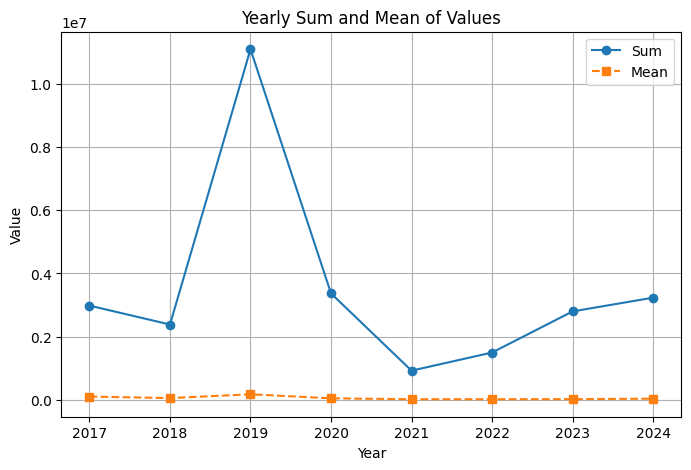

In [171]:
plt.figure(figsize=(8, 5))

plt.plot(grouped_sum.index, grouped_sum.values, marker='o', linestyle='-', label='Sum')
plt.plot(grouped_mean.index, grouped_mean.values, marker='s', linestyle='--', label='Mean')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Sum and Mean of Values')
plt.legend()
plt.grid(True)

plt.show()

In [172]:
grouped_df = df.groupby([df['datetime'].dt.year, 'Country'])['Peak Size'].sum().reset_index()



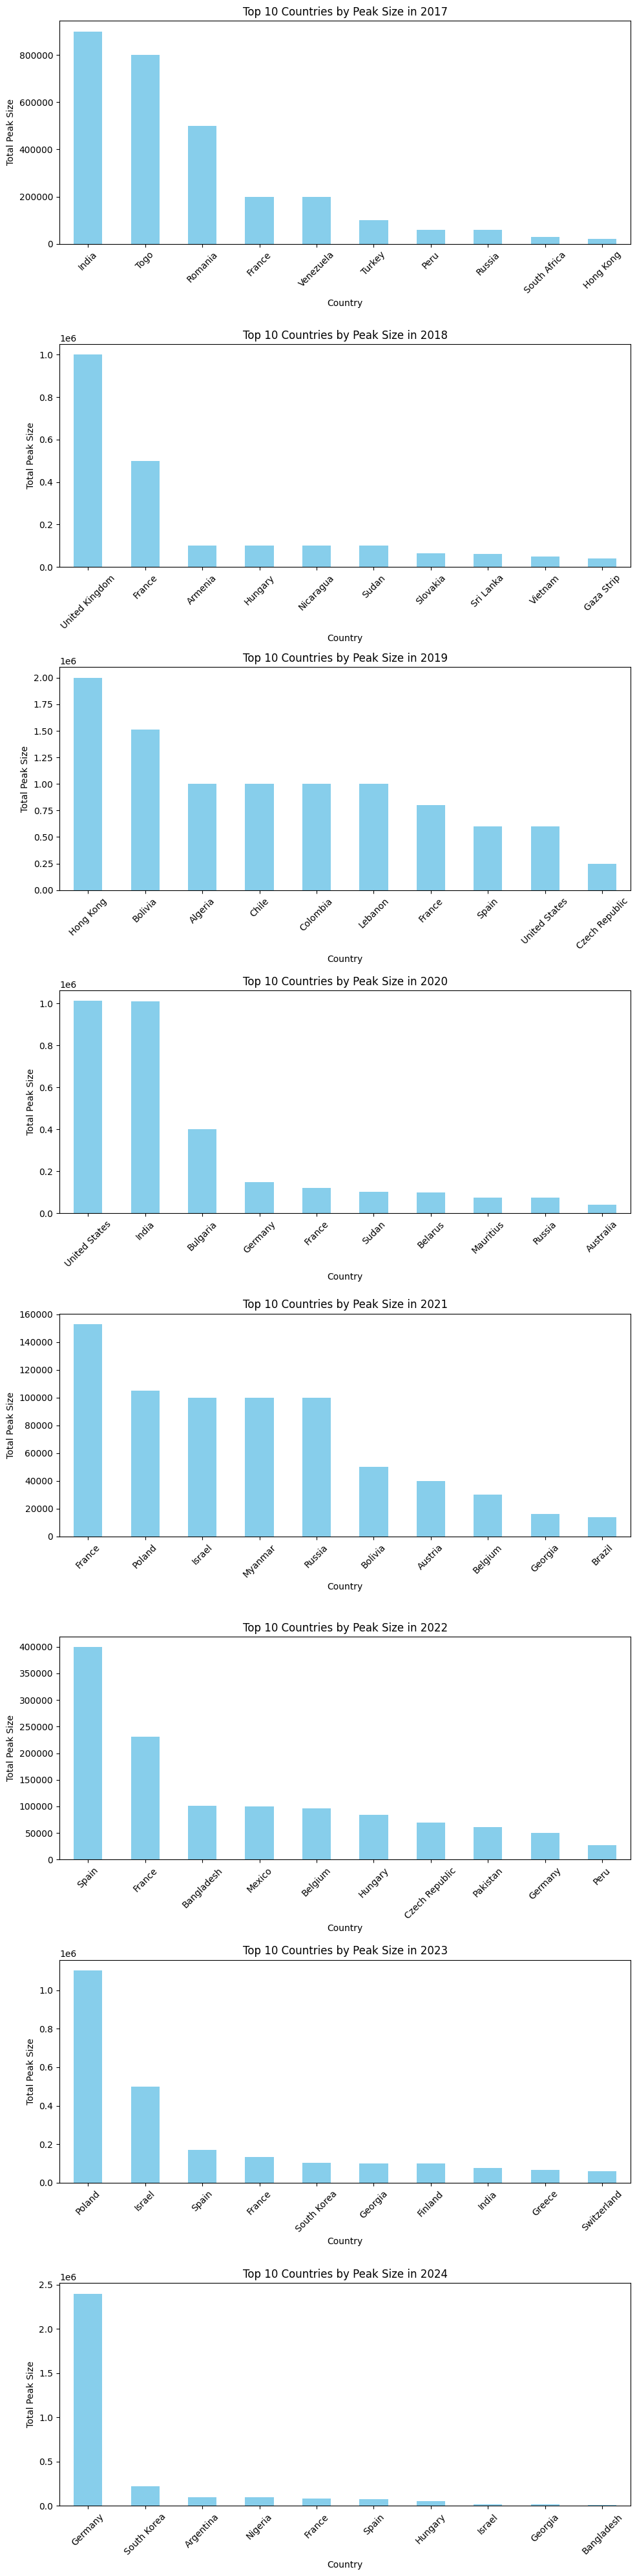

In [173]:
grouped_df = df.groupby([df['datetime'].dt.year, 'Country'])['Peak Size'].sum().reset_index()

# Plot top 10 countries for each year
fig, axes = plt.subplots(nrows=len(grouped_df['datetime'].unique()), figsize=(10, 5 * len(grouped_df['datetime'].unique())))

for i, year in enumerate(sorted(grouped_df['datetime'].unique())):
    # Filter data for the given year
    yearly_data = grouped_df[grouped_df['datetime'] == year].nlargest(10, 'Peak Size')
    
    # Create subplot for each year
    ax = axes[i] if len(grouped_df['datetime'].unique()) > 1 else axes
    yearly_data.plot(kind='bar', x='Country', y='Peak Size', ax=ax, legend=False, color='skyblue')
    
    ax.set_title(f"Top 10 Countries by Peak Size in {year}")
    ax.set_xlabel("Country")
    ax.set_ylabel("Total Peak Size")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [174]:
df['datetime'] = pd.to_datetime(df['Start Date'], format='%Y-%b-%d')

ValueError: time data "24-Dec" doesn't match format "%Y-%b-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [567]:

df_old = pd.read_csv("/Users/ggogia/Desktop/erdos/project/mmALL_073120_csv.csv")

df_old.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,mohawk indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...


In [585]:
df_old['participants'] =df_old['participants'].astype(str).str.replace(' ', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('nan', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace(',', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('.', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('>', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('<', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('+', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100s', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000s', '1000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('100+', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('thousands', '2000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('10000s', '20000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('hundreds', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('tensof1000', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Thousands', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('90000+', '100000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('dozens', '24', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Atleast10,000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('40000-80000', '80000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('tensof2000', '20000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100,000s', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('verylow2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000-3000', '2500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Asmanyas25,000protesters', '25000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan25000', '25000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About500people', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('400-600', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('200-400', '300', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('25000-200000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Around200protesters', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About30000', '200', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Atleast100', '100', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofcollegestudents', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Nearly700000', '70000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500people', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100-1500', '1500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About300people', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-100000', '100000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('over100arrested', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About80', '80', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('between35000and50000', '50000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Almost200', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Some500', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('SOME3000people', '3000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan4000people', '4000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Marchorganiserandlegal-sectorlawmakerDennisKwoksaidmorethan2000peoplejoinedtheprotestPoliceputtheturnoutat1700', 
                                                                       '1700', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('200-3000', '3000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('97publicorganisations', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200-2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('75000-170000', '170000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About100activistsincluding39suspectswhoweresummonedand66moresuspectswhowouldbesummonedtofacechargeslater', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1800participants', '1800', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About12000protesters', '12000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Upto100000', '100000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan10000protesters', '100000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About100villagers', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan10000citizens', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Almost350000', '350000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('65000people', '65000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Over200localprotesters', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan500000people', '500000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About150protesters', '150', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('5000members', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-10000', '10000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100000s-3000000', '3000000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('20000s', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-400', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100000s-3000000', '3000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1300-2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-80000', '80000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Between11000and45000', '45000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-6000', '6000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('30000-40000', '40000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About7000', '7000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Upto300people', '300', regex=False)




df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-5000', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-23000', '23000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan200campaigners', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-600', '600', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Around300localpeople', '300', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About6000people', '6000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofstudentprotesters', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-120000', '120000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('InnorthernChiangMaiprovince200kamsandvillageheads;inPhetchaburiabout400kamsandvillageheads', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About50protesters', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('30arrested', '30', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('about150', '150', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('ProtestsacrossIndia', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofresidents', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('busloads', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about300', '300', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('around50', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Civilians;acrowd', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Widespreadproteststhroughoutthevalley', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1100-20000', '20000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('widespread', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Civilians;acrowd', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('230families', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-700', '700', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Severalhundred', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-2000', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-7000', '7000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan1500detained', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50s', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-700', '700', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofIndiansincludingBollywoodactors', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Volunteersandalineformedofpeopleparticipatingtocookbeefandshareitwithstrangersinthestreets', '', regex=False)




df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan300people', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some100demonstrators', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About5000people', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('13000people', '13000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About50', '50', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Nearly70parents', '70', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Over2000constructionworkers', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About4000people', '4000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('between7500-25000', '25000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('TheCivilHumanRightsFrontsaid110000people;TheHongKongpolicesaid20000', '110000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to4000people', '4000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('scores(50)', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some250residents', '250', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofvillagers', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About100taxis', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50activists', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('ABOUT130members', '130', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('20000-30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan1000teachers', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofvillagers', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('atleast160000', '160000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofminers', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Over3000', '3000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Theorganiserssaidmorethan3000people;policesaidtheturnoutwas830atitspeak', '3000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500demonstrators', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Estimatedtobe15500', '15500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('10s', '20', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('250-300', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan200', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Estimatednumberofprotestersat10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofworkers', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('5000-10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('atleast160000', '160000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About4000', '4000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Estimated6000drivers', '6000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('12arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300s', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Around5000', '5000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('10000people', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Nearly500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200demonstrators', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('80-100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('agroup', '', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('About300protesters', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000-200000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('8000-9000', '9000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('4000arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500000-700000', '700000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('10000people', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-4000', '4000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About400', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('severalhundred', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('btw20000&30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About120', '120', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50_', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About300', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About130', '130', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100wounded', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100000-200000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20000-60000', '60000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-4500', '4500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100-20000', '20000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('5000-50000', '50000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100000s', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('severaldozen', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Tensof2000', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200of2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('164arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000000s', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50arrests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('severalthousand', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan400arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsof2000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Severalthousandprotesters', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Demonstrators', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Largedemonstrations', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Massprotests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hugeprotests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Severalthousand', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('700-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("Protestersonwhomthegovernmentsecurityforcesusedwatercannonsrubberbulletsandbatons", '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Afewhundredpeople', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Aboutahundredprotesters', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('HundredsofVenezuelans', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('AgeneralstrikethatparalysedVenezuela', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofyouths', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Millions', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethansevenmillionpeople', '7000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('16killed', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("overamillion", '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('afewdozen', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('afewthousand', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('25protestersinjured', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('AgeneralstrikethatparalysedVenezuela', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofyouths', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Millions', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethansevenmillionpeople', '7000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('1000000s', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('HUNDREDSOF2000ofVenezuelans', '100000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Rockedbyprotests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to1.4million', '1400000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to14million', '1400000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('scores', '', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('morethana24chools', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('several1000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('increasinglylargegatherings', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('24arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Massdemonstrations', '', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('several200', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundreds', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200-300', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('150-300', '300', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('4000-12000', '12000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('260-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Dozens', '40', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('several24', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('nearly10000', '10000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('afew200', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('millions', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('28LGBTgroups', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20000-40000', '40000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('teachersandpupils', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('fewthousand', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000S', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('7000-15000', '15000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('250000-350000', '350000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Over100', '100', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('1million', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('uptotwomillion', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500supporters', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('between100000&300000', '300000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000to8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000to5000', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('couple2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-350', '350', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some100residents', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-40000', '40000', regex=False)




df_old['participants'] =df_old['participants'].astype(str).str.replace('57formerestateworkers', '57', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-70000', '70000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('atleast500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some50members', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('600-700', '700', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-350', '350', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about8000', '8000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace("350-400", '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("60-70", '70', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('7000-9000', '9000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('150-200', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200000-400000', '400000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About200people', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofpeople', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200ofpeople', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan100people', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3500-5000', '5000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace("20000ofpeople", '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("Afewhundred", '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('afewhundred', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to3000', '3000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-20000', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About200people', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('35000-70000', '70000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200ofpeople', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000people', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('20,000ofpeople', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20,000ofpeople', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('600-3000', '3000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace("50arrested", '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("100people", '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-1,200', '1200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('fewdozen', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('400-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About200', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50people', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-500', '500', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace(',', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('.', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofpeople', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20000ofpeople', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-1200', '1200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000000s', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('800-900', '900', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-99', '90', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-60', '60', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100S', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Crowds', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100activistsincluding39suspectswhoweresummonedand66moresuspectswhowouldbesummonedtofacechargeslater', '100', regex=False)



df_old['participants'] = pd.to_numeric(df_old['participants'])

In [590]:
df_old = df_old[df_old["participants"]>0]
df_old.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

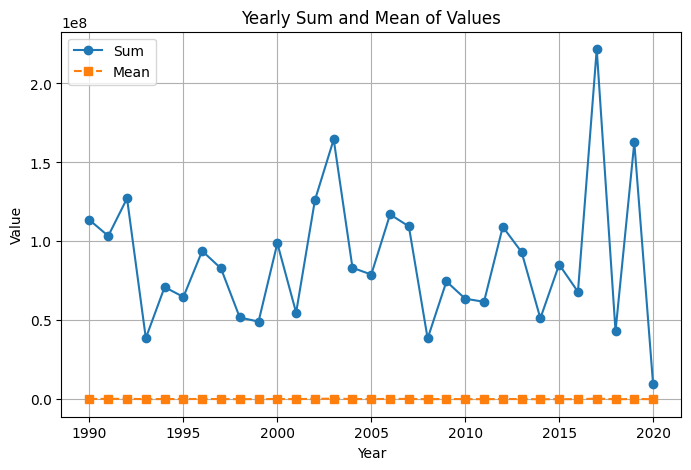

In [591]:
grouped_old_sum = df_old.groupby(df_old['year'])['participants'].sum()  # Aggregating by sum
grouped_old_mean = df_old.groupby(df_old['year'])['participants'].mean() 



plt.figure(figsize=(8, 5))

plt.plot(grouped_old_sum.index, grouped_old_sum.values, marker='o', linestyle='-', label='Sum')
plt.plot(grouped_old_mean.index, grouped_old_mean.values, marker='s', linestyle='--', label='Mean')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Sum and Mean of Values')
plt.legend()
plt.grid(True)

plt.show()

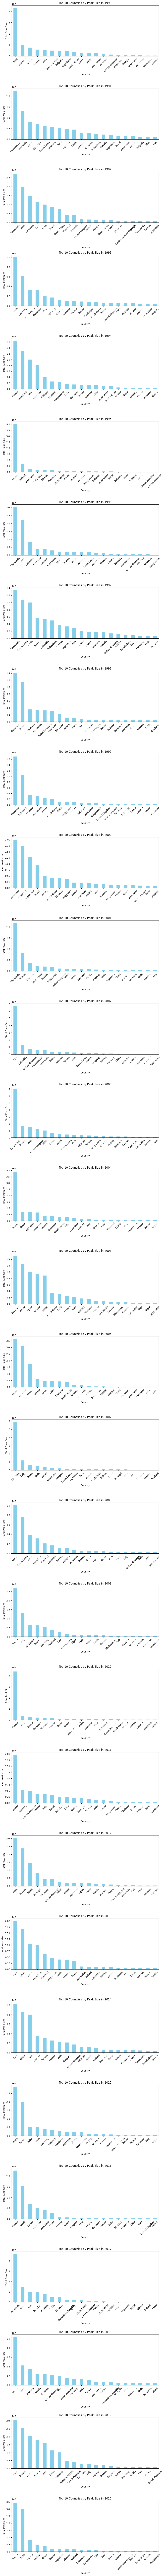

In [597]:
grouped_df_old = df_old.groupby([df_old['year'], 'country'])['participants'].sum().reset_index()

# Plot top 10 countries for each year
fig, axes = plt.subplots(nrows=len(grouped_df_old['year'].unique()), figsize=(10, 5 * len(grouped_df_old['year'].unique())))

for i, year in enumerate(sorted(grouped_df_old['year'].unique())):
    # Filter data for the given year
    yearly_data = grouped_df_old[grouped_df_old['year'] == year].nlargest(20, 'participants')
    
    # Create subplot for each year
    ax = axes[i] if len(grouped_df_old['year'].unique()) > 1 else axes
    yearly_data.plot(kind='bar', x='country', y='participants', ax=ax, legend=False, color='skyblue')
    
    ax.set_title(f"Top 10 Countries by Peak Size in {year}")
    ax.set_xlabel("Country")
    ax.set_ylabel("Total Peak Size")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [61]:
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
0,Ecuador,"Protest for ""Guayaquil Four"" boys",2024-Dec,Partly Free,"Four teenage boys (the ""Guayaquil Four"") disap...",Demand justice for missing boys. Express anger...,>100,"General public, families of missing boys",Active,The nationwide protests pushed authorities to ...,X,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Quito
1,Kenya,Protest against abductions of government critics,2024-Dec,Partly Free,The Kenya National Commission on Human Rights ...,Denounce the extrajudicial arrests. Demand tha...,>100,"Human rights groups, youth",1 day,No policy/leadership change. Though President ...,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Nairobi
2,Bangladesh,March for Unity,2024-Dec,Partly Free,The Anti-Discrimination Student Movement organ...,Call for prosecution of Hasina and others resp...,">1,000",Anti-Discrimination Student Movement (student ...,1 day,No policy/leadership change. The interim gover...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Dhaka
3,Türkiye,Minimum wage protest,2024-Dec,Not Free,The Turkish government raised the monthly mini...,Demand greater increase in minimum wage. Frust...,">1,000","General public, workers",1 day,No policy/leadership change.,NaN,X,NaN,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Ankara
4,Syria,Protest for religious freedom,2024-Dec,Not Free,A video posted on social media showed masked i...,Express anger over burning of the Christmas tr...,>100,Christians,1 day,No policy/leadership change.,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Damascus


In [54]:
df['Start Date'].values

array(['2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-01

In [96]:
(1-0.99**2)**(1/3)

0.2709886026170329

In [99]:
(1-0.95**2)**(1/3)

0.4602582041257945

In [100]:
numerator = 2 * 10**3
denominator = ((17.3)**2 * 10**-4) * ((6.28)**2 * 10**-8)

# Compute the result
result = numerator / denominator
result

169440998462.613